Hello everyone,
In this Data Science Project i have used Kaggle dataset which is of Bank "Customer Churn Bank" (basically means customers were leaving the bank and stopped buying the products of the bank). In this project i have all the necessary steps to be done before building the model. 
 
 The steps are:
 1. Data Collection
 2. Data Exploration
 3. Data Cleaning
 4. Training Algorithim
 5. Testing Algorithim
 
 In this model i have used KNN & Logistics Regression.
 

Imported all the required libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
Loading the dataset

In [5]:
df = pd.read_csv('C:\\Users\\Boby Sinha\\OneDrive\\Desktop\\My DS Project\\ChurnBank.csv')

In [6]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [10]:
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

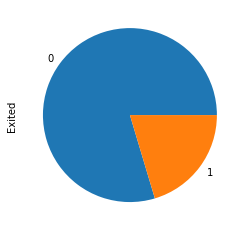

In [11]:
df.Exited.value_counts().plot(kind='pie');

In [12]:
df.Gender=df.Gender.map({'Male':1,'Female':0})
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


In [13]:
df.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [14]:
df.groupby('Exited').CreditScore.mean()

Exited
0    651.853196
1    645.351497
Name: CreditScore, dtype: float64

In [15]:
df.groupby('Exited').Age.mean()

Exited
0    37.408389
1    44.837997
Name: Age, dtype: float64

In [16]:
df.groupby('Exited').Tenure.mean()

Exited
0    5.033279
1    4.932744
Name: Tenure, dtype: float64

In [17]:
df.groupby('Exited').Balance.mean()

Exited
0    72745.296779
1    91108.539337
Name: Balance, dtype: float64

In [18]:
df.groupby('Exited').EstimatedSalary.mean()

Exited
0     99738.391772
1    101465.677531
Name: EstimatedSalary, dtype: float64

In [19]:
df.groupby('Exited').NumOfProducts.value_counts()

Exited  NumOfProducts
0       2                4242
        1                3675
        3                  46
1       1                1409
        2                 348
        3                 220
        4                  60
Name: NumOfProducts, dtype: int64

In [20]:
df.NumOfProducts.value_counts()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

Data Visualization 

c:\users\boby sinha\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='NumOfProducts', ylabel='count'>

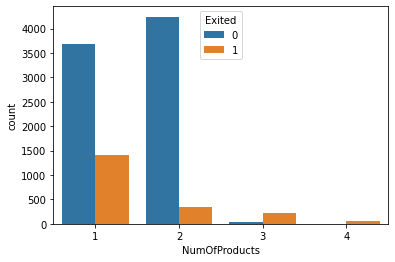

In [21]:
sns.countplot('NumOfProducts',hue='Exited',data=df)

c:\users\boby sinha\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


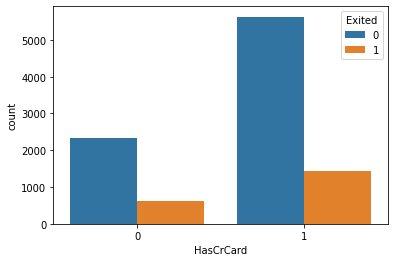

In [22]:
sns.countplot('HasCrCard',hue='Exited',data=df);

c:\users\boby sinha\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

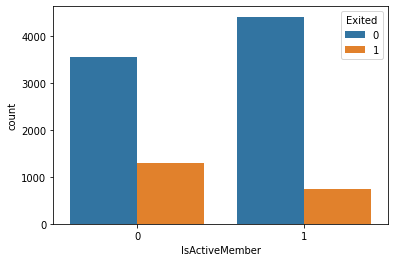

In [23]:
sns.countplot('IsActiveMember',hue='Exited',data=df)

c:\users\boby sinha\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Geography', ylabel='count'>

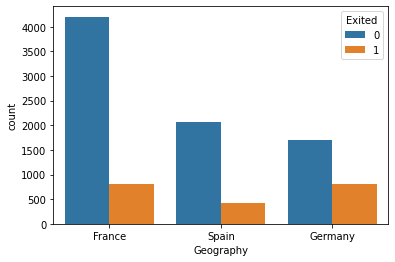

In [24]:
sns.countplot('Geography',hue='Exited',data=df)

c:\users\boby sinha\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

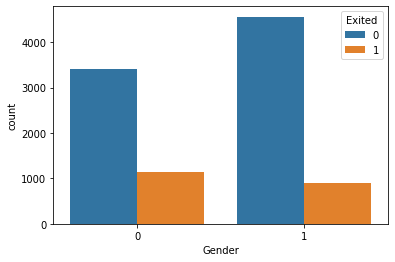

In [25]:
sns.countplot('Gender',hue='Exited',data=df)

Preprocessing the data

In [26]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


In [32]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited', 'Country_France', 'Country_Germany',
       'Country_Spain'],
      dtype='object')

In [41]:
feature_columns=['CreditScore', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Country_France', 'Country_Germany',
       'Country_Spain']

In [42]:
X=df[feature_columns]
y=df.Exited

Trining & Testing Data

In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
scaler = StandardScaler()

In [45]:
X=scaler.fit_transform(X)

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=26)

In [53]:
from sklearn.neighbors import KNeighborsClassifier

In [54]:
knn = KNeighborsClassifier(n_neighbors=5)

In [55]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [56]:
knn.predict_proba(X_test)

array([[0.6, 0.4],
       [0.6, 0.4],
       [1. , 0. ],
       ...,
       [0.2, 0.8],
       [1. , 0. ],
       [1. , 0. ]])

In [57]:
knn.score(X_train,y_train)

0.8690666666666667

In [58]:
knn.score(X_test,y_test)

0.8308

In [59]:
knn.predict(X_test)

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [60]:
from sklearn.linear_model import LogisticRegression

In [61]:
logit=LogisticRegression()

In [62]:
logit.fit(X_train,y_train)

LogisticRegression()

In [63]:
logit.score(X_train,y_train)

0.8081333333333334

In [64]:
logit.score(X_test,y_test)

0.8192

In [65]:
X_test[0]

array([ 0.36701255, -1.09598752, -0.08789694, -1.04175968,  0.27380666,
        2.52705662, -1.54776799, -1.03067011, -1.56419105, -1.00280393,
        1.72790383, -0.57380915])

In [66]:
logit.predict(X_test)

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [67]:
np.array([(p>0.6)*1 for _,p in logit.predict_proba(X_test)],dtype='int64')

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [68]:
logit.intercept_

array([-1.63698959])

In [69]:
logit.coef_

array([[-0.08648976, -0.27152538,  0.73825884, -0.04884118,  0.17032798,
        -0.07833407, -0.00817867, -0.54517757,  0.0156333 , -0.11384397,
         0.24165857, -0.11083466]])

In [70]:
feature_columns

['CreditScore',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Country_France',
 'Country_Germany',
 'Country_Spain']

In [71]:
from sklearn.metrics import confusion_matrix

In [72]:
confusion_matrix(y_test,logit.predict(X_test))

array([[1943,   75],
       [ 377,  105]], dtype=int64)

In [73]:
tn, fp, fn, tp = confusion_matrix(y_test,logit.predict(X_test)).ravel()

In [74]:
print(tn)

1943


In [75]:
print(fp)


75


In [76]:
print(fn)

377
